In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline

Funcion que se quiere minimizar y su derivada:

In [2]:
func = lambda t: t[0]**2 + t[1]**2
dfunc = lambda t: [2*t[0], 2*t[1]]

Tomamos muestras de la función en una rejilla regular:

In [3]:
N = 100
mx = 2.5
_X = np.linspace(-mx,mx,N)
_Y = np.linspace(-mx,mx,N)
_Z = np.zeros((N,N))

for ix,x in enumerate(_X):
    for iy,y in enumerate(_Y):
        _Z[iy,ix]=func([x,y])

Gráfico de la función:

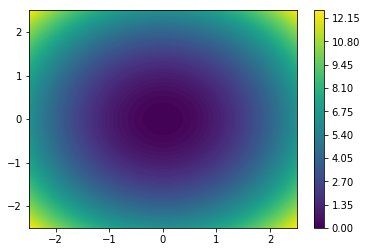

In [4]:
plt.contourf(_X,_Y,_Z,100)
plt.colorbar()
plt.show()

Sorteamos un punto cualquiera (semilla) y lo visualizamos:

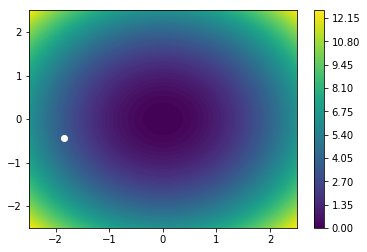

In [5]:
Theta = np.random.rand(2)*4-2

plt.contourf(_X,_Y,_Z,100)
plt.colorbar()
plt.plot(Theta[0], Theta[1],"o",c="white")
plt.show()

Proponemos un valor para la tasa de aprendizaje (eta) e iteramos varias veces:

In [6]:
eta = 0.05
M = 100
tlist = np.zeros((M,2))
for i in range(M):
    Theta = Theta - [eta*dfunc(Theta)[0], eta*dfunc(Theta)[1]]
    tlist[i] = Theta

Visualizamos el resultado del método:

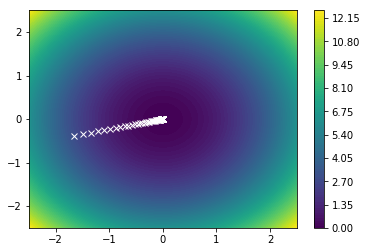

In [7]:
plt.contourf(_X,_Y,_Z,100)
plt.colorbar()
plt.plot(tlist[:,0], tlist[:,1],"x",c="white")
plt.show()

Ahora con una función más complicada:

In [8]:
def func(theta):
    x = theta[0]
    y = theta[1]
    z = np.sin(.5*x**2-.25*y)*np.cos(2*x+1-np.exp(y))
    return(z)

def dfunc(theta):
    x = theta[0]
    y = theta[1]
    z = np.zeros(2)
    arg1 = .5*x**2-.25*y
    arg2 = 2*x+1-np.exp(y)
    z[0] = x*np.cos(arg1)*np.cos(arg2) - 2.*np.sin(arg1)*np.sin(arg2)
    z[1] = -0.25*np.cos(arg1)*np.cos(arg2) - np.exp(y)*np.sin(arg1)*np.sin(arg2)    
    return(z)

In [9]:
N = 100
mx = 2.5
_X = np.linspace(-mx,mx,N)
_Y = np.linspace(-mx,mx,N)
_Z = np.zeros((N,N))

for ix,x in enumerate(_X):
    for iy,y in enumerate(_Y):
        _Z[iy,ix]=func([x,y])      

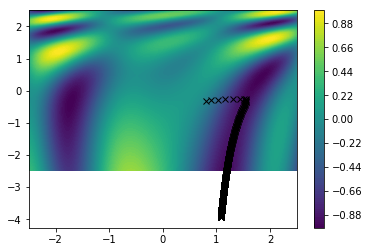

In [49]:
eta = 0.1
M = 1500
tlist = np.zeros((M,2))
Theta = np.random.rand(2)*4-2
for i in range(M):
    Theta = Theta - [eta*dfunc(Theta)[0], eta*dfunc(Theta)[1]]
    tlist[i] = Theta

plt.contourf(_X,_Y,_Z,100)
plt.colorbar()
plt.plot(Theta[0], Theta[1],"o",c="white")
plt.plot(tlist[:,0], tlist[:,1], "x",c="black")
plt.show() 